# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import statistics as stat
from scipy import stats as st
import pandas as pd
from collections import Counter
import pylab as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [5]:
ny = temp[temp['State']=='New York']
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
average = ny['Temperature'].sum()/len(ny['Temperature'])
average.round(3)

10.741

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
sup_fif = temp[(temp['Temperature'] > 15)]
sup_fif

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
ct = sup_fif.groupby(by=['City']).apply(print)

       City        State  Temperature
3  Hartford  Connecticut    17.222222
  City     State  Temperature
0  NYC  New York    19.444444
     City       State  Temperature
6  Newark  New Jersey         20.0
     City       State  Temperature
5  Treton  New Jersey    22.222222


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
in_rg = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
lst = list(in_rg['City'])
lst

['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
temp.groupby('State').mean()

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [11]:
temp.groupby('State').std()

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [12]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [13]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

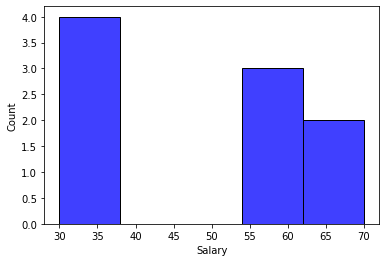

In [57]:
sns.histplot(x=employee.Salary, color='b');

#### What's the average salary in this company?

In [62]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [63]:
max(employee['Salary'])

70

#### What's the lowest salary?

In [64]:
min(employee['Salary'])

30

#### Who are the employees with the lowest salary?

In [74]:
employee.groupby(by=['Department']).Salary.mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

Los empleados con peor sueldo son los del departamento de 'HR'.

#### Could you give all the information about an employee called David?

In [79]:
employee[employee['Name']=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [83]:
employee[employee['Name']=='David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [88]:
employee.groupby('Title').apply(print)

     Name Department Education Gender Title  Years  Salary
6  Carlos         IT    Master      M    VP      8      70
8     Ana         HR    Master      F    VP      8      70
    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30
3  Sonia         HR  Bachelor      F  analyst      4      35
     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


""


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [89]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [93]:
employee.loc[0:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [95]:
employee[employee['Salary'] > 55].Name

6    Carlos
7     Pedro
8       Ana
Name: Name, dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [97]:
employee.groupby('Years').Salary.mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [98]:
employee.groupby('Title').Salary.mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

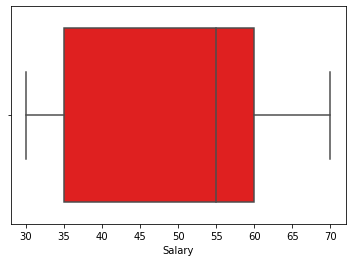

In [110]:
#Salario

sns.boxplot(x=employee.Salary, color='r');

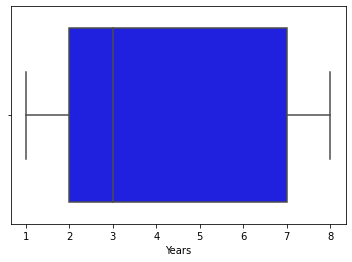

In [113]:
# Años de contrato

sns.boxplot(x=employee.Years, color='b');

In [119]:
# print first quartile here

fst_salry = np.percentile(employee.Salary, 25)
fst_year = np.percentile(employee.Years, 25)
print(fst_salry)
print(fst_year)

35.0
2.0


In [120]:
# print third quartile here

trd_salry = np.percentile(employee.Salary, 75)
trd_year = np.percentile(employee.Years, 75)
print(trd_salry)
print(trd_year)

60.0
7.0


#### Is the mean salary per gender different?

In [124]:
employee.groupby(['Title', 'Gender']).Salary.mean()

Title      Gender
VP         F         70.0
           M         70.0
analyst    F         32.5
           M         32.5
associate  F         55.0
           M         57.5
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [125]:
employee.groupby('Department').Salary.min()

Department
HR       30
IT       30
Sales    55
Name: Salary, dtype: int64

In [126]:
employee.groupby('Department').Salary.max()

Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64

In [127]:
employee.groupby('Department').Salary.mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [129]:
def rango(lst):
    return max(lst) - min(lst)

In [130]:
employee.groupby('Department').Salary.apply(rango)

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [132]:
orders = pd.read_csv('Orders.csv')
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [133]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [141]:
described = orders.describe()
described

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [149]:
mean=described['UnitPrice'][1]
mean

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [150]:
minim = described['UnitPrice'][3]
minim

0.0

In [151]:
maxim = described['UnitPrice'][7]
maxim

8142.75

#### Select all the customers we have in Spain

In [183]:
orders[orders.Country == 'Spain'].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [155]:
orders[orders.Country == 'Spain'].count()

Unnamed: 0      2485
InvoiceNo       2485
StockCode       2485
year            2485
month           2485
day             2485
hour            2485
Description     2485
Quantity        2485
InvoiceDate     2485
UnitPrice       2485
CustomerID      2485
Country         2485
amount_spent    2485
dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [158]:
def custom(n):
    if n>50:
        return n

In [160]:
orders.groupby('CustomerID').count().InvoiceNo.apply(custom).dropna()

CustomerID
12347    182.0
12349     73.0
12352     85.0
12354     58.0
12356     59.0
         ...  
18260    134.0
18263     61.0
18272    166.0
18283    756.0
18287     70.0
Name: InvoiceNo, Length: 1908, dtype: float64

#### Select orders from Spain that are above 50 items

In [161]:
orders[orders['Country'] == 'Spain'].groupby('CustomerID')\
                                    .count()\
                                    .InvoiceNo\
                                    .apply(custom)\
                                    .dropna()

CustomerID
12354     58.0
12462     62.0
12484    346.0
12502    147.0
12539    273.0
12540    478.0
12541     52.0
12546     69.0
12550     57.0
12556    121.0
12597    206.0
17097    211.0
Name: InvoiceNo, dtype: float64

#### Select all free orders

In [172]:
orders[orders['UnitPrice']==0].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [164]:
def custom2(string):
    if 'lunch bag' in string:
        return string

In [165]:
orders.Description.apply(custom2).dropna()

93            lunch bag red retrospot
172       lunch bag dolly girl design
354       lunch bag dolly girl design
359           lunch bag red retrospot
360        lunch bag spaceboy design 
                     ...             
397465      lunch bag alphabet design
397713        lunch bag  black skull.
397714        lunch bag red retrospot
397877    lunch bag red vintage doily
397880        lunch bag red retrospot
Name: Description, Length: 11556, dtype: object

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [166]:
orders[orders['year']==2011].Description.apply(custom2).dropna()

26340         lunch bag red retrospot
26341              lunch bag woodland
26512      lunch bag spaceboy design 
26513              lunch bag woodland
26860         lunch bag pink polkadot
                     ...             
397465      lunch bag alphabet design
397713        lunch bag  black skull.
397714        lunch bag red retrospot
397877    lunch bag red vintage doily
397880        lunch bag red retrospot
Name: Description, Length: 11234, dtype: object

#### Show the frequency distribution of the amount spent in Spain.

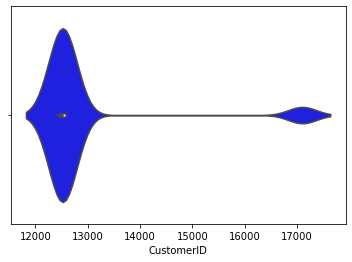

In [174]:
spanish = orders[orders['Country']=='Spain']
sns.violinplot(x=spanish.CustomerID, color='b');

#### Select all orders made in the month of August

In [176]:
aug = orders[orders['month']==8]
aug.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [179]:
aug.groupby('Country').InvoiceNo.count()

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: InvoiceNo, dtype: int64

#### What's the  average amount of money spent by country

In [180]:
orders.groupby('Country').amount_spent.mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [187]:
orders['StockCode'].describe().top

'85123A'

#### What was the average amount spent per year ?

In [190]:
orders['amount_spent'].describe()[0]

397924.0